In [121]:
import pandas as pd
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
%matplotlib inline

In [122]:
#We take a look at the MAPE

def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [179]:
#Function that will plot the prediction vs True for a window of x day. The nbvoisin argument is used to specify to
# the function for how many neighbors we will look for. Indeed, as you will see below, the MAPE reached
#a minimum for a number K of neighbors, and this number K depends on the considered window. The program therefore 
#first look for the number K which minimizes the MAPE then plot what we could qualify as the best 
#prediction.
def KNN(region,jour, nbvoisin):
    train = pd.read_csv('../dataset_centrale/data/train/{}.csv'.format(region))
    test = pd.read_csv('../dataset_centrale/data/test/{}.csv'.format(region))
    train.drop(['month','week','weekday','hour','timestamp','flag_holiday', 'flag_long_weekend'], axis=1, inplace=True)
    train = pd.get_dummies(train)
    test.drop(['month','week','weekday','hour','timestamp','flag_holiday', 'flag_long_weekend'], axis=1, inplace=True)
    test = pd.get_dummies(test)

    x_train = train.drop('Consommation', axis=1)
    y_train = train['Consommation']
    x_test = test.drop('Consommation', axis = 1)
    y_test = test['Consommation']
    
    #We pute the data at scale so as to be able to find out the neighbours
    
    scale = MinMaxScaler(feature_range=(0, 1))
    x_train_at_scale = scale.fit_transform(x_train)
    x_train = pd.DataFrame(x_train_at_scale)
    x_test_at_scale = scale.fit_transform(x_test)
    x_test = pd.DataFrame(x_test_at_scale)
    
    mape_val = [] #we are storing the different value of the MAPE for K neigbours
    for K in range(1,nbvoisin+1):
        model = neighbors.KNeighborsRegressor(n_neighbors = K)
        model.fit(x_train, y_train)  
        pred=model.predict(x_test) #We make a prediction for the test sample
        mape= mean_absolute_percentage_error(y_test[:48*jour],pred[:48*jour]) #we calculate MAPE
        mape_val.append(mape) 
    
    best_k=1+mape_val.index(min(mape_val)) #we find the K that minimize the MAPE
    model = neighbors.KNeighborsRegressor(n_neighbors = best_k) #We use this K to make our prediciton
    model.fit(x_train, y_train)
    prediction=model.predict(x_test)
    data_test=y_test[:48*jour]
    data_pred=prediction[:48*jour]
    mape=mean_absolute_percentage_error(data_test,data_pred)
    plt.plot(data_pred,label='prediction') #We plot the prediciton vs the True sample
    plt.plot(data_test,label='True')
    plt.xticks([48*x for x in range(jour+1)], range(jour+1))
    plt.title("KNN: Prediction vs True in {} for {} neighbours, with a MAPE of {}".format(region,best_k,mape,))
    plt.xlabel("Day")
    plt.ylabel("Consumption(MW)")
    plt.legend()
    plt.show()

    
    
    

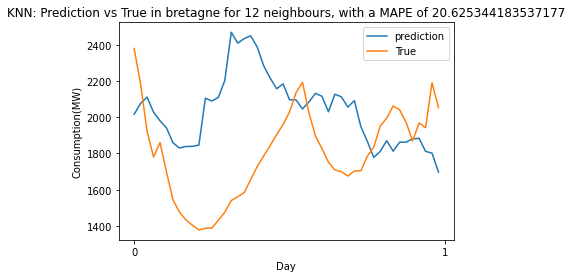

In [180]:
KNN('bretagne',1,100)

In [187]:
#As it was said before, the MAPE depends on the windowsize and the number of neighbours.
#This function plot the evolution of the MAPE as a function of the number of neighbours, for a given windowsize
def evol_mape(region,jour,voisinmax):
    train = pd.read_csv('../dataset_centrale/data/train/{}.csv'.format(region))
    test = pd.read_csv('../dataset_centrale/data/test/{}.csv'.format(region))
    train.drop(['month','week','weekday','hour','timestamp','flag_holiday', 'flag_long_weekend'], axis=1, inplace=True)
    train = pd.get_dummies(train)
    test.drop(['month','week','weekday','hour','timestamp','flag_holiday', 'flag_long_weekend'], axis=1, inplace=True)
    test = pd.get_dummies(test)

    x_train = train.drop('Consommation', axis=1)
    y_train = train['Consommation']
    x_test = test.drop('Consommation', axis = 1)
    y_test = test['Consommation']
    
    
    scale = MinMaxScaler(feature_range=(0, 1))
    x_train_at_scale = scale.fit_transform(x_train)
    x_train = pd.DataFrame(x_train_at_scale)
    x_test_at_scale = scale.fit_transform(x_test)
    x_test = pd.DataFrame(x_test_at_scale)
    
    mape_val = [] 
    for K in range(1,voisinmax+1):
        model = neighbors.KNeighborsRegressor(n_neighbors = K)
        model.fit(x_train, y_train)  
        pred=model.predict(x_test) 
        mape= mean_absolute_percentage_error(y_test[:48*jour],pred[:48*jour])
        mape_val.append(mape) 
        
    plt.plot(mape_val)
    plt.xticks([10*x for x in range(int(voisinmax/10)+1)],[10*x for x in range(int(voisinmax/10)+1)] )
    plt.title("KNN: Evolution of the MAPE in {} for a windowsize of {} days".format(region,jour))
    plt.xlabel("Amount of neighbours")
    plt.ylabel("MAPE")
    plt.legend()
    plt.show()
    

No handles with labels found to put in legend.


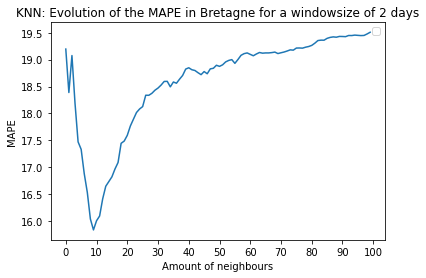

In [188]:
evol_mape('Bretagne',2,100)

In [147]:
#this function compute the MAPE for a given windowsize and a given amount of neigbours
def MAPE(region,voisin,jour):
    train = pd.read_csv('../dataset_centrale/data/train/{}.csv'.format(region))
    test = pd.read_csv('../dataset_centrale/data/test/{}.csv'.format(region))
    train.drop(['month','week','weekday','hour','timestamp','flag_holiday', 'flag_long_weekend'], axis=1, inplace=True)
    train = pd.get_dummies(train)
    test.drop(['month','week','weekday','hour','timestamp','flag_holiday', 'flag_long_weekend'], axis=1, inplace=True)
    test = pd.get_dummies(test)

    x_train = train.drop('Consommation', axis=1)
    y_train = train['Consommation']
    x_test = test.drop('Consommation', axis = 1)
    y_test = test['Consommation']
    
    
    scale = MinMaxScaler(feature_range=(0, 1))
    x_train_at_scale = scale.fit_transform(x_train)
    x_train = pd.DataFrame(x_train_at_scale)
    x_test_at_scale = scale.fit_transform(x_test)
    x_test = pd.DataFrame(x_test_at_scale)
    
    model = neighbors.KNeighborsRegressor(n_neighbors = voisin)
    model.fit(x_train, y_train)  
    pred=model.predict(x_test) 
    mape= mean_absolute_percentage_error(y_test[:48*jour],pred[:48*jour]) 
    
    return float(mape)

    

In [149]:
MAPE('bretagne',12,1)

20.625344183537177

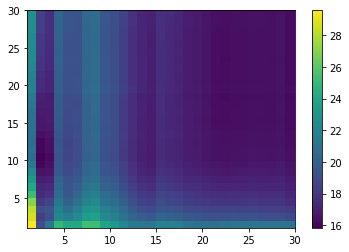

In [166]:
#We can do a heatmap to see the evolution. I didn't put it in the presentation the conclusion weren't relevant.
region='Bretagne'
x = np.linspace(1,30,30,dtype=int) #nombre de voisins
y = np.linspace(1,30,30,dtype=int) #nombre de jours
X, Y = np.meshgrid(x, y)

Z=np.zeros((30,30))
for i in range(30):
    for j in range(30):
        Z[i,j]=MAPE(region,X[i,i],Y[j,j])

plt.pcolor(X, Y, Z)
plt.colorbar()
plt.show()
    